# Tagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

We are studying the cross-section super-ratio $\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}$

last edit Nov-26 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [4]:
_,e_e_pi_n,_ = load_SIDIS_data( Nruns = 101,
                               taggedsubdirname= "sidisdvcs_25Nov2022_commit_5b2a758",
                               do_e_e_pi=False, 
                               do_e_e_pi_FreeP=False, 
                               fdebug=1)

Done loading files.

Total statistics:
3820  d(e,e'π+n) events
1231  d(e,e'π-n) events


## (2) Apply selection cuts not previously imposed

In [5]:
_,e_e_pi_n_pass_cuts,_,_ = apply_further_selection_cuts_to_data(fdebug=2);

Applying selection cuts not previously imposed
(2) Applying cuts to d(e,e'πn) data
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus which includes 2746 events
Applying p-theta on cut for piplus on 2746 events
478 in sector 1
451 in sector 2
465 in sector 3
448 in sector 4
461 in sector 5
442 in sector 6
Applying p-theta on cut for piminus which includes 842 events
Applying p-theta on cut for piminus on 842 events
135 in sector 1
141 in sector 2
165 in sector 3
143 in sector 4
122 in sector 5
136 in sector 6
Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
3820 events after original cut (100.0 %)
1733 events after p-theta cut (45.4 %)
1680 events after Kinematical cut (44.0 %)
(e,e π- )
1231 events after original cut (100.0 %)
811 events after p-theta cut (65.9 %)
793 events after Kinematical cut (64.4 %)
 
Done applying event-selection cuts


## (3) Define binning in $x_B$ and $z_\pi$
For a moving proton $x'$, defined as
$ x' = Q^2/((W')^2 - m_N^2 + Q^2)$

In [103]:
z_bins   = np.array([0.35,0.45,0.65])
z_widths = np.array([0.05,0.05,0.15])

zeta_bins   = np.array([0.03, 0.09, 0.22 ])
zeta_widths = np.array([0.03, 0.03, 0.10])

x_bins   = np.array([0.2, 0.32, 0.44, 0.56 ])
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))
    
print('zeta bins:',zeta_bins)
for zeta_bin,zeta_width in zip(zeta_bins,zeta_widths):
    zeta_min,zeta_max = zeta_bin-zeta_width, zeta_bin+zeta_width
    print('%.3f < zeta < %.3f:'%(zeta_min,zeta_max))    

x bins: [0.2  0.32 0.44 0.56]
z bins: [0.35 0.45 0.65]
0.300 < z < 0.400:
0.400 < z < 0.500:
0.500 < z < 0.800:
zeta bins: [0.03 0.09 0.22]
0.000 < zeta < 0.060:
0.060 < zeta < 0.120:
0.120 < zeta < 0.320:


In [104]:
var_label = "standing proton x"
# var_label = "moving proton x"
if   var_label == "standing proton x":
    var    = 'xB'
    xlabel = "Bjorken $x$"
    
elif var_label == "moving proton x":
    var    = 'xPrime2'
    xlabel = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"    

# (4) Extract tabular data and save results to a csv file

In [105]:
extract_SIDIS_ratio(df_dict  = e_e_pi_n_pass_cuts,                    
                    x_var    = var ,                                               
                    x_bins   = x_bins,
                    zvar     = "Zpi",
                    z_bins   = z_bins,                                               
                    z_widths = z_widths,                                               
                    fdebug   = 0,                    
                    prefix   = 'Tagged_SIDIS_ratio_',                                               
                    suffix   = '')

In [106]:
extract_SIDIS_ratio(df_dict  = e_e_pi_n_pass_cuts,                    
                    x_var    = var ,                                               
                    x_bins   = x_bins,
                    zvar     = "zeta_pi",
                    z_bins   = zeta_bins,                                               
                    z_widths = zeta_widths,                                               
                    fdebug   = 0,                    
                    prefix   = 'Tagged_SIDIS_ratio_',                                               
                    suffix   = '')

## load results and plot them

In [107]:
prefix = 'Tagged_SIDIS_ratio_'

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/
Done.


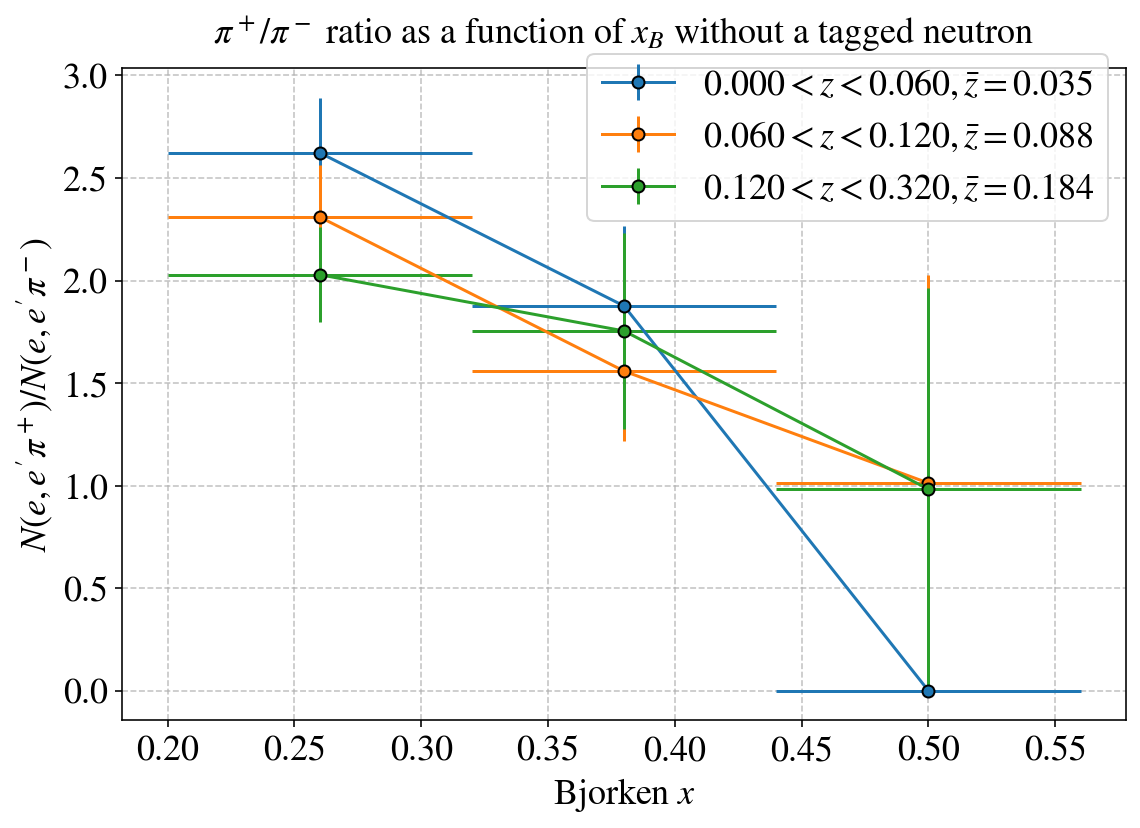

In [108]:
SIDIS_results = load_SIDIS_ratio(prefix = prefix, 
                                 zvar = "zeta_pi",
                                 suffix = suffix, fdebug=3,
                                 doPlotResults=True)

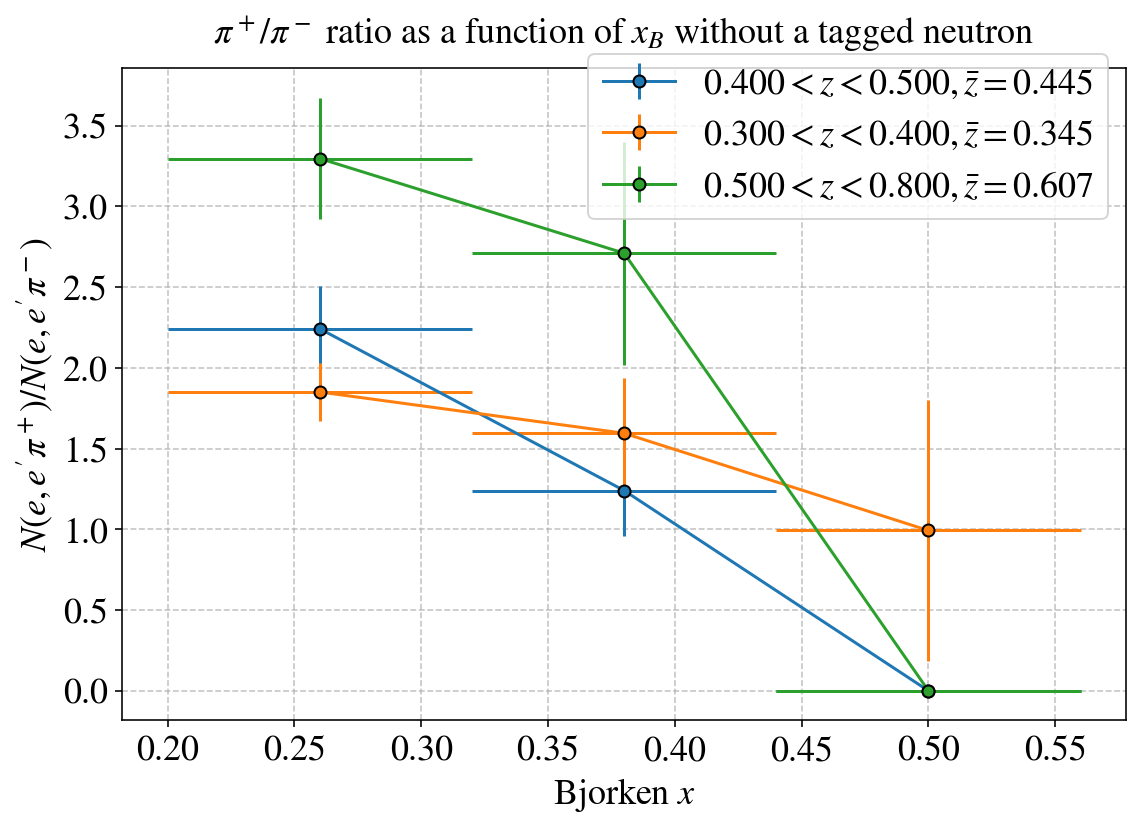

In [109]:
SIDIS_results = load_SIDIS_ratio(prefix = prefix, 
                                 zvar = "Zpi",
                                 suffix = suffix, fdebug=0,
                                 doPlotResults=True)

# (5) Extract modified results


## (5.1) Results in different bins of M_x

In [24]:
M_x_min_arr = [0.5,1.0,1.5,2.0,2.5]
M_x_max_arr = [1.0,1.5,2.0,2.5,3.0]

In [25]:
for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
    print(M_x_min,M_x_max)
    extract_SIDIS_ratio(df_dict  = e_e_pi_n_pass_cuts,
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= '/Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/',
                        prefix   = 'Tagged_SIDIS_ratio_',                    
                        suffix   = '_Mx_%.2f-%.2f_GeV'%(M_x_min,M_x_max),
                        M_x_min  = M_x_min,
                        M_x_max  = M_x_max)
    
print('done.')

0.5 1.0
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.300_Zmean_pipsnan_pimsnan_Zmax0.400_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.400_Zmean_pipsnan_pimsnan_Zmax0.500_Mx_0.50-1.00_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.500_Zmean_pips0.715_pimsnan_Zmax0.800_Mx_0.50-1.00_GeV.csv
1.0 1.5
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.300_Zmean_pips0.339_pims0.316_Zmax0.400_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.400_Zmean_pips0.458_pimsnan_Zmax0.500_Mx_1.00-1.50_GeV.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.500_Zmean_pips0.728_pims0.743_Zmax0.800_Mx_1.00-1.50_GeV.csv
1.5 2.0
saved /Users/erezcohen/Desktop/data/BAND/Results/Mx_bins/Tagged_SIDIS_ratio_Zmin0.300_Zmean_pips0.356_pims0.352_Zmax0.400_Mx_1.50-

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## (5.2) Results with no acceptance matching cut in $p-\theta$ 

In [9]:
_,e_e_pi_n_pass_cuts_no_p_theta_cut,_ = apply_further_selection_cuts_to_data(fdebug=2,
                                                                           NeventsMax=-1, 
                                                                           doAcceptanceMatchingCut=False);

Applying selection cuts not previously imposed
(e,e'πn)
Apply a cut on the minimal neutron momentum p > 0.275 GeV/c
(e,e π+ )
3820 events after original cut (100.0 %)
2746 events after p-theta cut (71.9 %)
2746 events after Kinematical cut (71.9 %)
(e,e π- )
1231 events after original cut (100.0 %)
842 events after p-theta cut (68.4 %)
842 events after Kinematical cut (68.4 %)
 
Done applying selection cuts not previously imposed


In [10]:
save_SIDIS_ratio_DataFrame(df_dict  = e_e_pi_n_pass_cuts_no_p_theta_cut,                                
                           x_var    = var ,                           
                           x_bins   = x_bins,                           
                           z_bins   = z_bins,                           
                           z_widths = z_widths,                           
                           fdebug   = 0,
                           prefix   = 'Tagged_SIDIS_ratio_',                           
                           suffix   = '_No_AcceptanceMatchingCut')

NameError: name 'save_SIDIS_ratio_DataFrame' is not defined

In [ ]:
prefix = 'Tagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
Tagged_SIDIS_results = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                                  prefix = prefix, suffix = suffix, doPlotResults=True)

# arxiv

In [ ]:

# Rpips2pims_n, Rpips2pims_n_errup, Rpips2pims_n_errdw = dict(), dict(), dict()
# Y, dY = dict(),dict()
# for z_bin,z_width in zip(z_bins,z_widths):
#     z_min,z_max = z_bin-z_width,z_bin+z_width
#     (Rpips2pims_n[z_bin],
#      Rpips2pims_n_errup[z_bin], 
#      Rpips2pims_n_errdw[z_bin],_,_) = compute_ratio_pips_to_pims(df_dict=e_e_pi_n  , 
#                                                              var=var, 
#                                                              bins=x_bins, 
#                                                              z_min=z_min,z_max=z_max)

#     # fit to a constant 
#     y    = Rpips2pims_n[z_bin]
#     y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
#     p,cov = np.polyfit(x,y,deg=0,cov=True)
#     Y[z_bin],dY[z_bin] = p[0],cov[0,0]

#     # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
# print('done') 

In [ ]:
# fig = plt.figure(figsize=(9,6))
# ax  = fig.add_subplot(1,1,1)
# for z_bin,z_width in zip(z_bins,z_widths):
#     y    = Rpips2pims_n[z_bin]
#     y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
#     x_fit = np.linspace(np.min(x),np.max(x),100)
#     y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
#     y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

#     # plot
#     l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
#                 marker='o',markeredgecolor='k',
#                 label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
#     ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
# set_axes(ax,xlabel,"$N(e,e'\pi^+n)/N(e,e'\pi^-n)$",
#          title="$\pi^+/\pi^-$ ratio as a function of $x'$ with a tagged neutron",
#          do_add_grid=True, do_add_legend=True, fontsize=18,
#         );